In [9]:
import pickle
import torch
import matplotlib.pyplot as plt

In [20]:
# 파일 경로
file_path = "/home/jaekim/ws/git/myHDR/trained-model-myHDR4noise-unsat_only_l1/trained_model20.pkl"

weights = torch.load(file_path)  # GPU에서 저장했다면 map_location 필수

# 모델 자체가 저장된 경우엔 .state_dict() 호출 필요
if hasattr(weights, "state_dict"):
    weights = weights.state_dict()

# state_dict 형태일 경우
if isinstance(weights, dict):
    for k, v in weights.items():
        print(f"{k}: {v.shape if hasattr(v, 'shape') else type(v)}")

module.conv1.weight: torch.Size([3, 3, 3, 3])
module.conv1.bias: torch.Size([3])
module.conv2.weight: torch.Size([3, 3, 3, 3])
module.conv2.bias: torch.Size([3])
module.conv3.weight: torch.Size([3, 3, 3, 3])
module.conv3.bias: torch.Size([3])


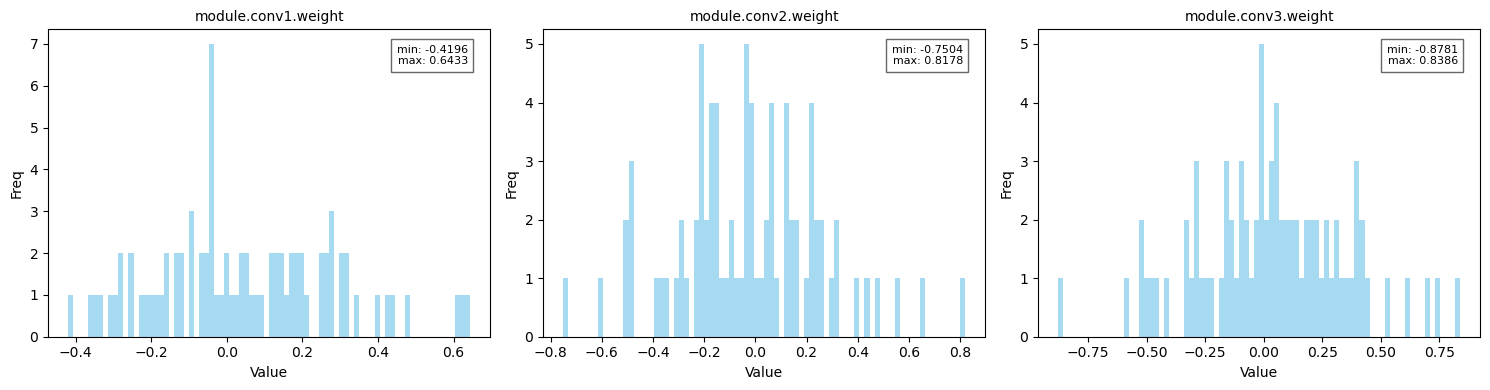

In [21]:
# plot 설정
num_plots = sum(1 for k in weights.keys() if "weight" in k and weights[k].ndim > 0)
cols = 3
rows = (num_plots + cols - 1) // cols
plt.figure(figsize=(5 * cols, 4 * rows))

plot_idx = 1
for name, param in weights.items():
    if "weight" in name and param.ndim > 0:
        values = param.flatten().cpu().numpy()
        min_val = values.min()
        max_val = values.max()

        plt.subplot(rows, cols, plot_idx)
        plt.hist(values, bins=80, color='skyblue', alpha=0.75)
        plt.title(name, fontsize=10)
        plt.xlabel("Value")
        plt.ylabel("Freq")

        # min/max 텍스트 표시
        text = f"min: {min_val:.4f}\nmax: {max_val:.4f}"
        plt.text(0.95, 0.95, text, transform=plt.gca().transAxes,
                 verticalalignment='top', horizontalalignment='right',
                 fontsize=8, bbox=dict(facecolor='white', alpha=0.6))

        plot_idx += 1

plt.tight_layout()
plt.show()